In [2]:
# Signal Analysis: Exponential Decay and Rectangular Pulse
# DTFT vs DFT Comparison

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)

QUESTION 3: EXPONENTIALLY DECAYING SIGNAL ANALYSIS

In [3]:

# (a) Generate an exponentially decaying signal
# ---------------------------------------------
# Reasoning: An exponential decay signal is commonly found in physics
# (radioactive decay, RC circuits) and is mathematically defined as:
# x[n] = A * exp(-alpha * n) for n >= 0
# where A is amplitude and alpha is decay rate

N = 100  # Number of samples
n = np.arange(N)  # Time index
A = 1.0  # Amplitude
alpha = 0.05  # Decay rate (controls how fast signal decays)

x_exp = A * np.exp(-alpha * n)

print(f"\nSignal Parameters:")
print(f"  - Number of samples (N): {N}")
print(f"  - Amplitude (A): {A}")
print(f"  - Decay rate (alpha): {alpha}")
print(f"  - Signal decays to {x_exp[-1]:.4f} at n={N-1}")


Signal Parameters:
  - Number of samples (N): 100
  - Amplitude (A): 1.0
  - Decay rate (alpha): 0.05
  - Signal decays to 0.0071 at n=99


(0.0, 99.0)

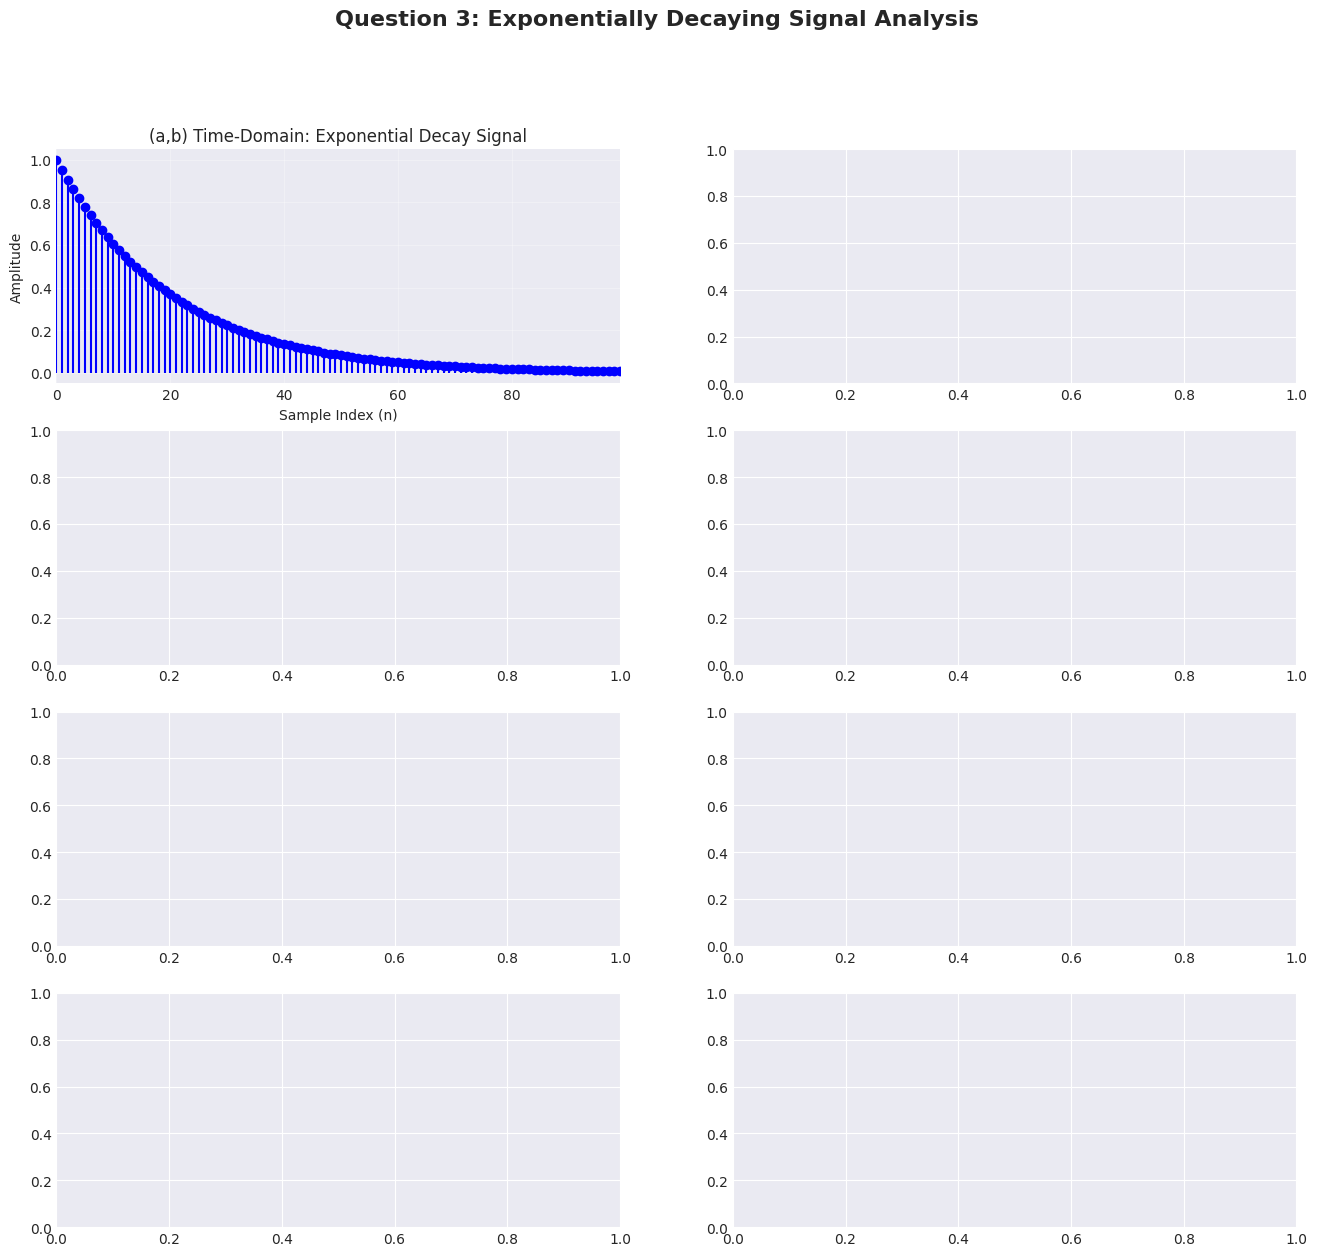

In [4]:
# (b) Plot the time-domain waveform
# ---------------------------------
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
fig.suptitle('Question 3: Exponentially Decaying Signal Analysis', 
             fontsize=16, fontweight='bold')

axes[0, 0].stem(n, x_exp, basefmt=' ', linefmt='b-', markerfmt='bo')
axes[0, 0].set_xlabel('Sample Index (n)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('(a,b) Time-Domain: Exponential Decay Signal')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim([0, N-1])

In [6]:
# (c) Compute DTFT and plot continuous frequency spectrum
# --------------------------------------------------------
# Reasoning: DTFT provides continuous frequency representation
# DTFT is computed by evaluating the Z-transform on the unit circle
# X(e^jω) = Σ x[n] * e^(-jωn) for ω ∈ [0, 2π]
# We approximate this by dense frequency sampling

omega = np.linspace(0, 2*np.pi, 2000)  # Dense frequency sampling
X_dtft = np.zeros(len(omega), dtype=complex)
# Compute DTFT by direct summation
for i, w in enumerate(omega):
    X_dtft[i] = np.sum(x_exp * np.exp(-1j * w * n))

# Plot DTFT Magnitude
axes[0, 1].plot(omega, np.abs(X_dtft), 'r-', linewidth=2)
axes[0, 1].set_xlabel('Frequency ω (rad/sample)')
axes[0, 1].set_ylabel('|X(e^jω)|')
axes[0, 1].set_title('(c) DTFT: Continuous Frequency Spectrum (Magnitude)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 2*np.pi])

# DTFT Phase
axes[1, 0].plot(omega, np.angle(X_dtft), 'g-', linewidth=2)
axes[1, 0].set_xlabel('Frequency ω (rad/sample)')
axes[1, 0].set_ylabel('∠X(e^jω) (radians)')
axes[1, 0].set_title('(c) DTFT: Phase Spectrum')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, 2*np.pi])

print(f"\nDTFT Computation:")
print(f"  - Frequency samples: {len(omega)}")
print(f"  - Max magnitude: {np.max(np.abs(X_dtft)):.4f}")
print(f"  - Frequency resolution: {omega[1]-omega[0]:.6f} rad/sample")



DTFT Computation:
  - Frequency samples: 2000
  - Max magnitude: 20.3660
  - Frequency resolution: 0.003143 rad/sample


In [7]:
# (d) Compute DFT and plot discrete frequency spectrum
# -----------------------------------------------------
# Reasoning: DFT provides discrete frequency samples of DTFT
# DFT samples DTFT at N equally spaced points: ωk = 2πk/N
# This is efficiently computed using FFT algorithm

X_dft = fft(x_exp)
freq_dft = fftfreq(N, d=1.0) * 2 * np.pi  # Convert to rad/sample
freq_dft = np.fft.fftshift(freq_dft)  # Shift for plotting
X_dft_shifted = np.fft.fftshift(X_dft)

# Plot DFT Magnitude
axes[1, 1].stem(freq_dft, np.abs(X_dft_shifted), basefmt=' ', 
                linefmt='b-', markerfmt='bo', label='DFT samples')
axes[1, 1].plot(omega - np.pi, np.abs(np.roll(X_dtft, len(X_dtft)//2)), 
                'r--', alpha=0.5, linewidth=1, label='DTFT (continuous)')
axes[1, 1].set_xlabel('Frequency ω (rad/sample)')
axes[1, 1].set_ylabel('|X[k]|')
axes[1, 1].set_title('(d) DFT: Discrete Frequency Spectrum (Magnitude)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()
axes[1, 1].set_xlim([-np.pi, np.pi])

# DFT Phase
axes[2, 0].stem(freq_dft, np.angle(X_dft_shifted), basefmt=' ', 
                linefmt='g-', markerfmt='go')
axes[2, 0].set_xlabel('Frequency ω (rad/sample)')
axes[2, 0].set_ylabel('∠X[k] (radians)')
axes[2, 0].set_title('(d) DFT: Phase Spectrum')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].set_xlim([-np.pi, np.pi])

print(f"\nDFT Computation:")
print(f"  - DFT length (N): {N}")
print(f"  - Frequency bins: {N}")
print(f"  - Frequency spacing: {2*np.pi/N:.4f} rad/sample")
print(f"  - Max DFT magnitude: {np.max(np.abs(X_dft)):.4f}")




DFT Computation:
  - DFT length (N): 100
  - Frequency bins: 100
  - Frequency spacing: 0.0628 rad/sample
  - Max DFT magnitude: 20.3660


In [11]:
# (e) Analysis: Comparison between DTFT and DFT
# ----------------------------------------------
axes[2, 1].plot(omega, np.abs(X_dtft), 'r-', linewidth=2, 
                label='DTFT (continuous)', alpha=0.7)
axes[2, 1].stem(np.linspace(0, 2*np.pi, N), np.abs(X_dft), 
                basefmt=' ', linefmt='b-', markerfmt='bo', 
                label='DFT samples')
axes[2, 1].set_xlabel('Frequency ω (rad/sample)')
axes[2, 1].set_ylabel('Magnitude')
axes[2, 1].set_title('(e) DTFT vs DFT Comparison')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim([0, 2*np.pi])

# Log-scale magnitude comparison
axes[3, 0].semilogy(omega, np.abs(X_dtft), 'r-', linewidth=2, 
                    label='DTFT', alpha=0.7)
axes[3, 0].semilogy(np.linspace(0, 2*np.pi, N), np.abs(X_dft), 
                    'bo-', label='DFT', markersize=4)
axes[3, 0].set_xlabel('Frequency ω (rad/sample)')
axes[3, 0].set_ylabel('Magnitude (log scale)')
axes[3, 0].set_title('(e) Log-Scale Magnitude Comparison')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3, which='both')
axes[3, 0].set_xlim([0, 2*np.pi])

# Theoretical DTFT formula for exponential decay
# For x[n] = A*exp(-alpha*n), DTFT = A / (1 - exp(-alpha)*exp(-jω))
X_theoretical = A / (1 - np.exp(-alpha) * np.exp(-1j * omega))
axes[3, 1].plot(omega, np.abs(X_theoretical), 'k--', linewidth=2, 
                label='Theoretical DTFT')
axes[3, 1].plot(omega, np.abs(X_dtft), 'r-', linewidth=1, 
                alpha=0.7, label='Computed DTFT')
axes[3, 1].set_xlabel('Frequency ω (rad/sample)')
axes[3, 1].set_ylabel('Magnitude')
axes[3, 1].set_title('(e) Theoretical vs Computed DTFT')
axes[3, 1].legend()
axes[3, 1].grid(True, alpha=0.3)
axes[3, 1].set_xlim([0, 2*np.pi])

plt.tight_layout()
plt.show()



<Figure size 1400x1000 with 0 Axes>

In [12]:
print("""
1. TIME-DOMAIN CHARACTERISTICS:
   - Exponential decay starts at amplitude A and decays towards zero
   - Decay rate α controls how quickly signal approaches zero
   - Signal is causal (non-zero only for n ≥ 0)

2. DTFT CHARACTERISTICS:
   - Provides CONTINUOUS frequency representation
   - Smooth curve showing frequency content at infinite resolution
   - Low-pass character: strongest at low frequencies (ω ≈ 0)
   - Magnitude decreases as frequency increases
   
3. DFT CHARACTERISTICS:
   - Provides DISCRETE samples of DTFT at N points
   - Samples occur at ωk = 2πk/N for k = 0, 1, ..., N-1
   - DFT is periodic with period N
   - Computationally efficient via FFT algorithm

4. RELATIONSHIP BETWEEN TIME AND FREQUENCY:
   - Slow decay (small α) → Narrow spectrum (energy concentrated at low ω)
   - Fast decay (large α) → Wider spectrum (energy spread across frequencies)
   - The smoother the time signal, the more concentrated the spectrum
   
5. DTFT vs DFT:
   - DFT samples are exactly equal to DTFT values at sample points
   - DFT provides only N frequency samples, DTFT is continuous
   - For complete frequency analysis, DTFT is more informative
   - For computation and digital processing, DFT is practical
   
6. THEORETICAL VALIDATION:
   - Computed DTFT matches theoretical formula closely
   - Small deviations due to finite signal length (truncation effect)
""")


1. TIME-DOMAIN CHARACTERISTICS:
   - Exponential decay starts at amplitude A and decays towards zero
   - Decay rate α controls how quickly signal approaches zero
   - Signal is causal (non-zero only for n ≥ 0)

2. DTFT CHARACTERISTICS:
   - Provides CONTINUOUS frequency representation
   - Smooth curve showing frequency content at infinite resolution
   - Low-pass character: strongest at low frequencies (ω ≈ 0)
   - Magnitude decreases as frequency increases

3. DFT CHARACTERISTICS:
   - Provides DISCRETE samples of DTFT at N points
   - Samples occur at ωk = 2πk/N for k = 0, 1, ..., N-1
   - DFT is periodic with period N
   - Computationally efficient via FFT algorithm

4. RELATIONSHIP BETWEEN TIME AND FREQUENCY:
   - Slow decay (small α) → Narrow spectrum (energy concentrated at low ω)
   - Fast decay (large α) → Wider spectrum (energy spread across frequencies)
   - The smoother the time signal, the more concentrated the spectrum

5. DTFT vs DFT:
   - DFT samples are exactly equal

RECTANGULAR PULSE SIGNAL

In [13]:
# (a) Generate rectangular pulse signal
# --------------------------------------
# Reasoning: Rectangular pulse is fundamental in signal processing
# Defined as x[n] = 1 for 0 ≤ n < L, and x[n] = 0 elsewhere
# Its DTFT is a sinc-like function (Dirichlet kernel)

N_pulse = 128  # Total length for analysis
L = 20  # Pulse duration
n_pulse = np.arange(N_pulse)

# Create rectangular pulse
x_rect = np.zeros(N_pulse)
x_rect[0:L] = 1.0

print(f"\nSignal Parameters:")
print(f"  - Total samples (N): {N_pulse}")
print(f"  - Pulse duration (L): {L}")
print(f"  - Duty cycle: {L/N_pulse*100:.1f}%")


Signal Parameters:
  - Total samples (N): 128
  - Pulse duration (L): 20
  - Duty cycle: 15.6%


(-0.2, 1.3)

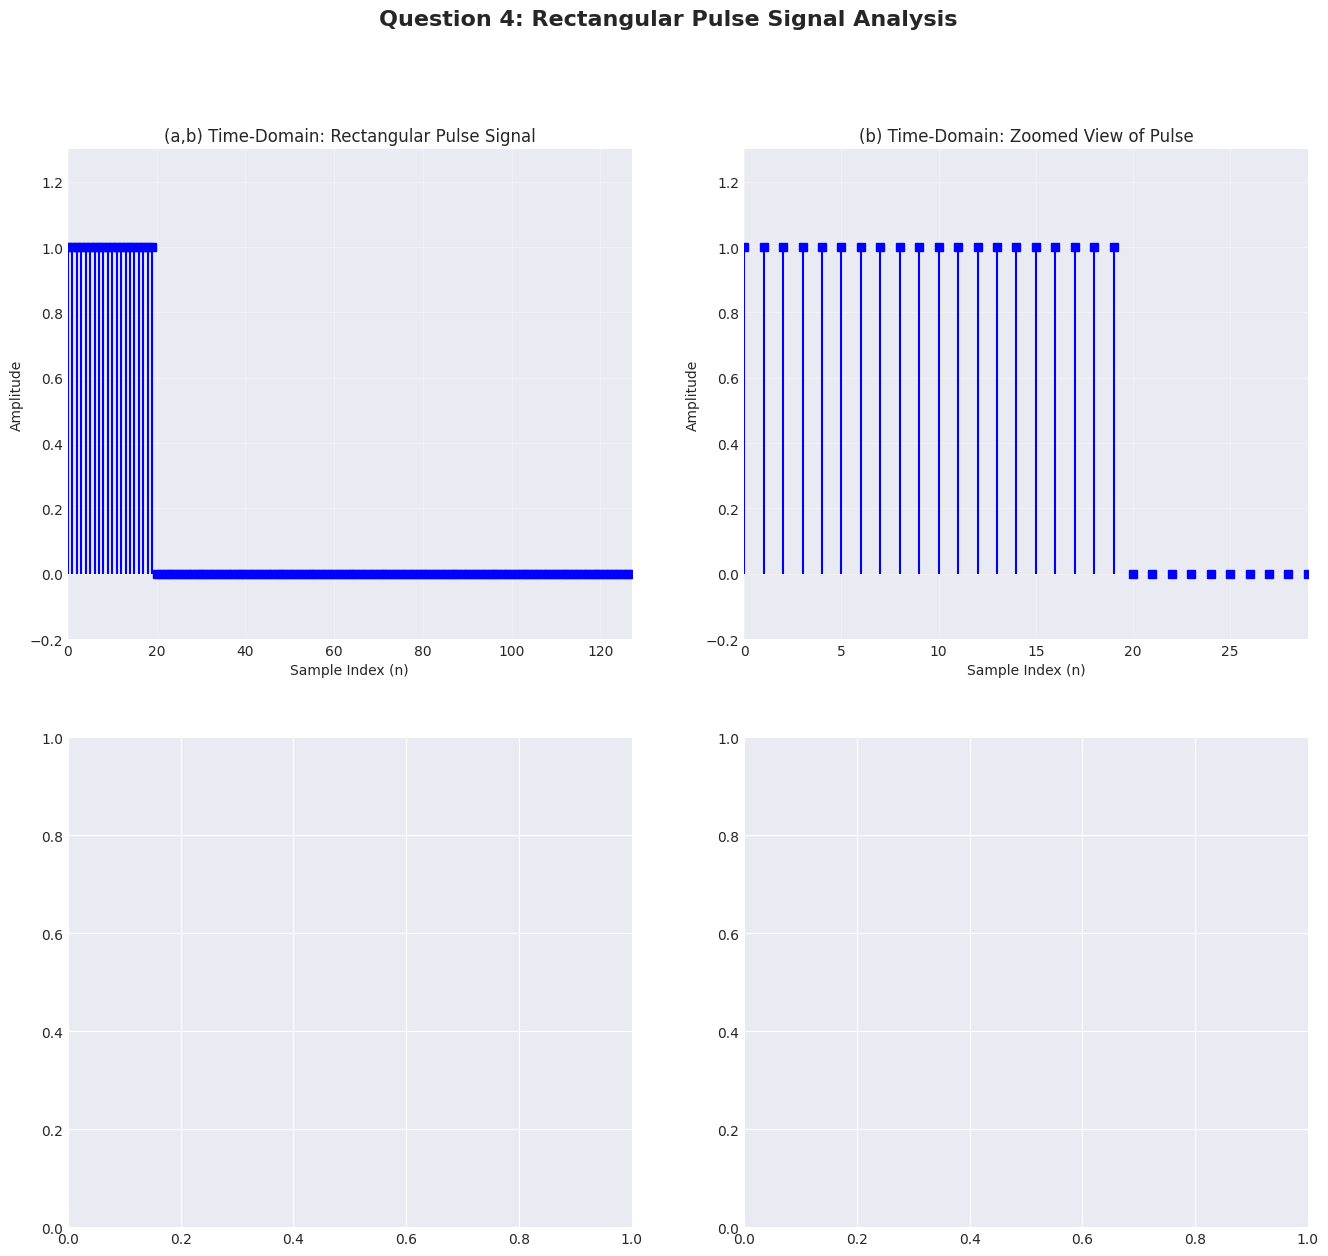

In [18]:
# (b) Plot time-domain waveform
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Question 4: Rectangular Pulse Signal Analysis', 
             fontsize=16, fontweight='bold')

axes[0, 0].stem(n_pulse, x_rect, basefmt=' ', linefmt='b-', markerfmt='bs')
axes[0, 0].set_xlabel('Sample Index (n)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('(a,b) Time-Domain: Rectangular Pulse Signal')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim([0, N_pulse-1])
axes[0, 0].set_ylim([-0.2, 1.3])

# Zoomed view of pulse
axes[0, 1].stem(n_pulse[:30], x_rect[:30], basefmt=' ', 
                linefmt='b-', markerfmt='bs')
axes[0, 1].set_xlabel('Sample Index (n)')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('(b) Time-Domain: Zoomed View of Pulse')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim([0, 29])
axes[0, 1].set_ylim([-0.2, 1.3])

In [19]:
# (c) Compute DTFT and plot continuous spectrum
# ----------------------------------------------
# Reasoning: Rectangular pulse has characteristic sinc-like spectrum
# Main lobe width inversely proportional to pulse duration

omega_pulse = np.linspace(0, 2*np.pi, 2000)
X_dtft_pulse = np.zeros(len(omega_pulse), dtype=complex)

# Compute DTFT
for i, w in enumerate(omega_pulse):
    X_dtft_pulse[i] = np.sum(x_rect * np.exp(-1j * w * n_pulse))

# Plot DTFT Magnitude
axes[1, 0].plot(omega_pulse, np.abs(X_dtft_pulse), 'r-', linewidth=2)
axes[1, 0].set_xlabel('Frequency ω (rad/sample)')
axes[1, 0].set_ylabel('|X(e^jω)|')
axes[1, 0].set_title('(c) DTFT: Continuous Frequency Spectrum (Magnitude)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, 2*np.pi])
axes[1, 0].axvline(x=2*np.pi/L, color='g', linestyle='--', 
                   alpha=0.5, label=f'First null at ω={2*np.pi/L:.3f}')
axes[1, 0].legend()

print(f"\nDTFT Computation:")
print(f"  - Frequency samples: {len(omega_pulse)}")
print(f"  - Max magnitude: {np.max(np.abs(X_dtft_pulse)):.4f}")
print(f"  - DC component (ω=0): {np.abs(X_dtft_pulse[0]):.4f}")
print(f"  - First null at: ω ≈ {2*np.pi/L:.4f} rad/sample")

# DTFT Phase
axes[1, 1].plot(omega_pulse, np.angle(X_dtft_pulse), 'g-', linewidth=2)
axes[1, 1].set_xlabel('Frequency ω (rad/sample)')
axes[1, 1].set_ylabel('∠X(e^jω) (radians)')
axes[1, 1].set_title('(c) DTFT: Phase Spectrum')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, 2*np.pi])



DTFT Computation:
  - Frequency samples: 2000
  - Max magnitude: 20.0000
  - DC component (ω=0): 20.0000
  - First null at: ω ≈ 0.3142 rad/sample


(0.0, 6.283185307179586)


DFT Computation:
  - DFT length (N): 128
  - Frequency bins: 128
  - Frequency spacing: 0.0491 rad/sample
  - Max DFT magnitude: 20.0000
  - DC component: 20.0000


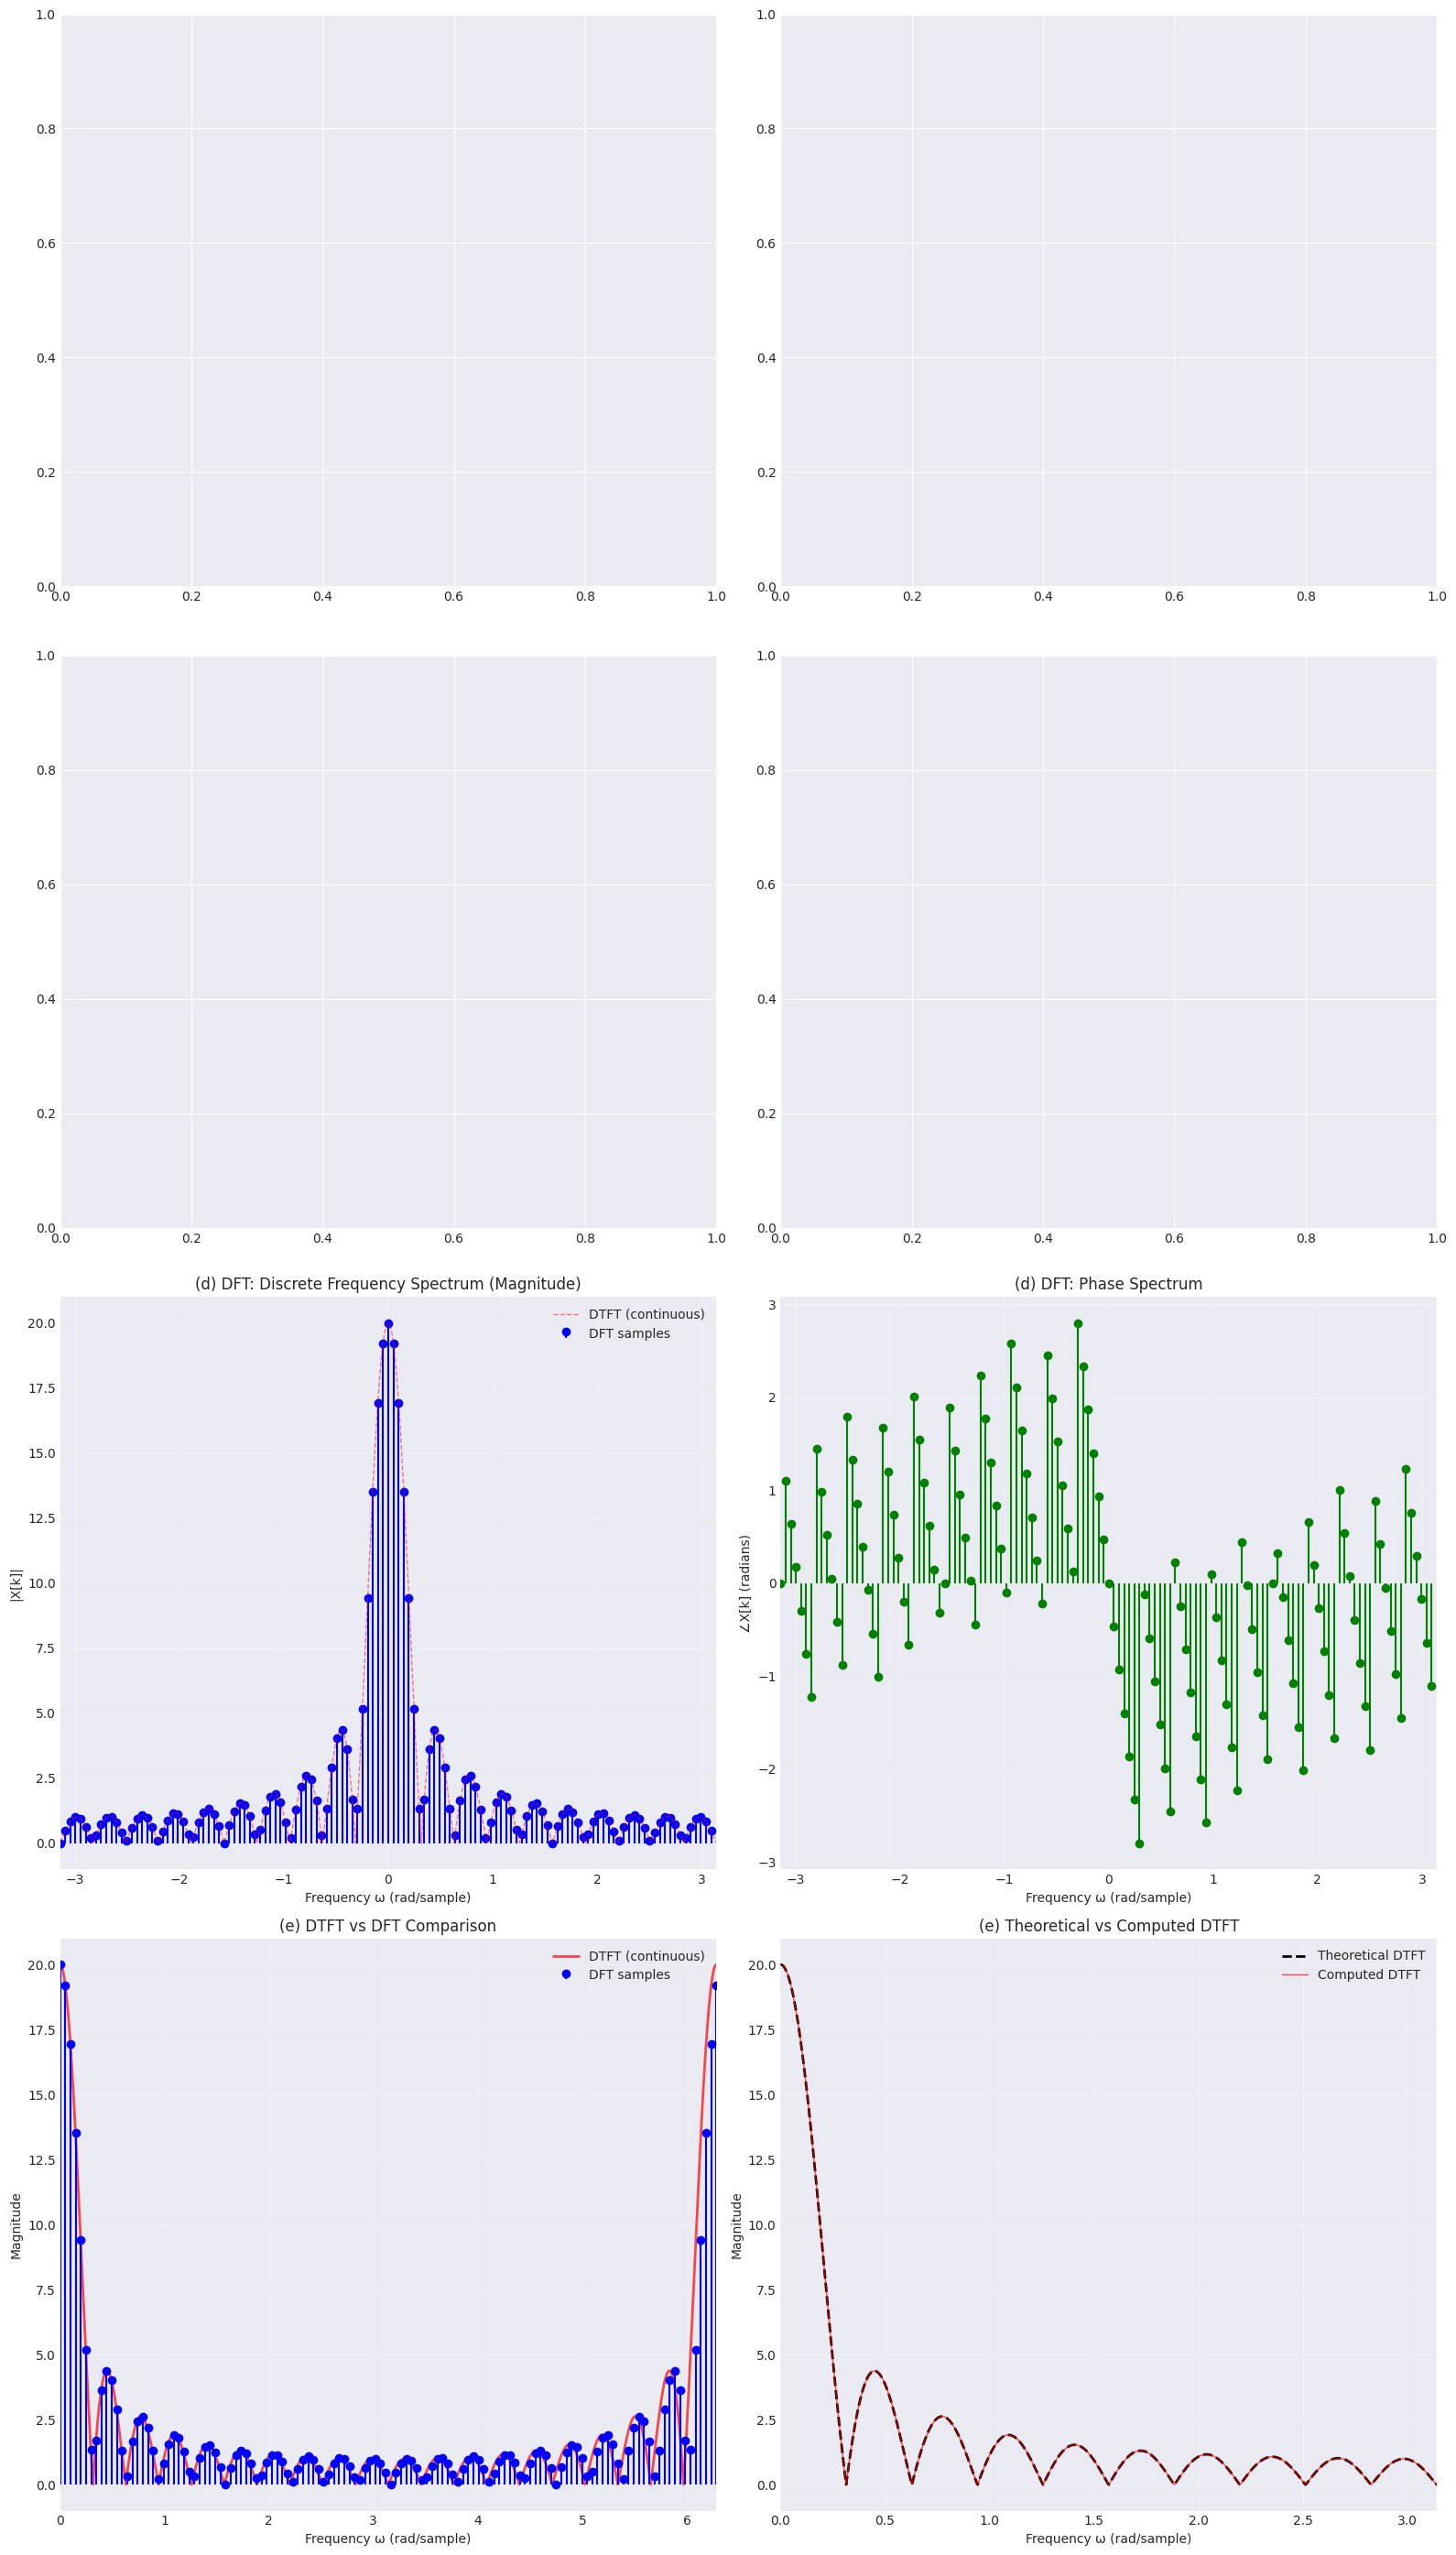


ANALYSIS (Question 4):

1. TIME-DOMAIN CHARACTERISTICS:
   - Rectangular pulse is ON for L=20 samples, OFF elsewhere
   - Abrupt transitions (discontinuities) at edges
   - Finite energy signal with energy = L
   - Represents ideal "gate" or "window" function

2. DTFT CHARACTERISTICS:
   - Sinc-like spectrum (Dirichlet kernel form)
   - Main lobe centered at ω = 0 (DC component = 20)
   - First null occurs at ω = 2π/L ≈ 0.3142 rad/sample
   - Side lobes decay slowly (Gibbs phenomenon)
   - Nulls occur at integer multiples of 2π/L

3. DFT CHARACTERISTICS:
   - Samples DTFT at N=128 equally spaced points
   - May or may not capture nulls depending on L and N relationship
   - Some DFT bins might miss important spectral features
   - Periodic extension with period N

4. RELATIONSHIP BETWEEN TIME AND FREQUENCY:
   - Short pulse (small L) → Wide main lobe (spread spectrum)
   - Long pulse (large L) → Narrow main lobe (concentrated spectrum)
   - Main lobe width ≈ 4π/L rad/sample (between f

In [23]:
# (d) Compute DFT and plot discrete spectrum
# -------------------------------------------
X_dft_pulse = fft(x_rect)
freq_dft_pulse = fftfreq(N_pulse, d=1.0) * 2 * np.pi
freq_dft_pulse_shifted = np.fft.fftshift(freq_dft_pulse)
X_dft_pulse_shifted = np.fft.fftshift(X_dft_pulse)
fig, axes = plt.subplots(4, 2, figsize=(16, 28))
# Plot DFT Magnitude
axes[2, 0].stem(freq_dft_pulse_shifted, np.abs(X_dft_pulse_shifted), 
                basefmt=' ', linefmt='b-', markerfmt='bo', label='DFT samples')
axes[2, 0].plot(omega_pulse - np.pi, 
                np.abs(np.roll(X_dtft_pulse, len(X_dtft_pulse)//2)), 
                'r--', alpha=0.5, linewidth=1, label='DTFT (continuous)')
axes[2, 0].set_xlabel('Frequency ω (rad/sample)')
axes[2, 0].set_ylabel('|X[k]|')
axes[2, 0].set_title('(d) DFT: Discrete Frequency Spectrum (Magnitude)')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].legend()
axes[2, 0].set_xlim([-np.pi, np.pi])

print(f"\nDFT Computation:")
print(f"  - DFT length (N): {N_pulse}")
print(f"  - Frequency bins: {N_pulse}")
print(f"  - Frequency spacing: {2*np.pi/N_pulse:.4f} rad/sample")
print(f"  - Max DFT magnitude: {np.max(np.abs(X_dft_pulse)):.4f}")
print(f"  - DC component: {np.abs(X_dft_pulse[0]):.4f}")

# DFT Phase
axes[2, 1].stem(freq_dft_pulse_shifted, np.angle(X_dft_pulse_shifted), 
                basefmt=' ', linefmt='g-', markerfmt='go')
axes[2, 1].set_xlabel('Frequency ω (rad/sample)')
axes[2, 1].set_ylabel('∠X[k] (radians)')
axes[2, 1].set_title('(d) DFT: Phase Spectrum')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].set_xlim([-np.pi, np.pi])

# (e) Analysis: DTFT vs DFT Comparison
# -------------------------------------
axes[3, 0].plot(omega_pulse, np.abs(X_dtft_pulse), 'r-', linewidth=2, 
                label='DTFT (continuous)', alpha=0.7)
axes[3, 0].stem(np.linspace(0, 2*np.pi, N_pulse), np.abs(X_dft_pulse), 
                basefmt=' ', linefmt='b-', markerfmt='bo', 
                label='DFT samples')
axes[3, 0].set_xlabel('Frequency ω (rad/sample)')
axes[3, 0].set_ylabel('Magnitude')
axes[3, 0].set_title('(e) DTFT vs DFT Comparison')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)
axes[3, 0].set_xlim([0, 2*np.pi])

# Theoretical DTFT for rectangular pulse
# X(e^jω) = sin(ωL/2) / sin(ω/2) * exp(-jω(L-1)/2)
# This is the Dirichlet kernel
omega_theory = omega_pulse[omega_pulse != 0]  # Avoid division by zero
numerator = np.sin(omega_theory * L / 2)
denominator = np.sin(omega_theory / 2)
X_theoretical_pulse = numerator / denominator * np.exp(-1j * omega_theory * (L-1) / 2)

# Handle ω = 0 separately (L'Hopital's rule gives L)
X_theoretical_full = np.zeros(len(omega_pulse), dtype=complex)
X_theoretical_full[0] = L
X_theoretical_full[1:] = X_theoretical_pulse

axes[3, 1].plot(omega_pulse, np.abs(X_theoretical_full), 'k--', 
                linewidth=2, label='Theoretical DTFT')
axes[3, 1].plot(omega_pulse, np.abs(X_dtft_pulse), 'r-', 
                linewidth=1, alpha=0.7, label='Computed DTFT')
axes[3, 1].set_xlabel('Frequency ω (rad/sample)')
axes[3, 1].set_ylabel('Magnitude')
axes[3, 1].set_title('(e) Theoretical vs Computed DTFT')
axes[3, 1].legend()
axes[3, 1].grid(True, alpha=0.3)
axes[3, 1].set_xlim([0, np.pi])

plt.tight_layout()
plt.show()

# Analysis and Insights
print("\n" + "="*70)
print("ANALYSIS (Question 4):")
print("="*70)
print(f"""
1. TIME-DOMAIN CHARACTERISTICS:
   - Rectangular pulse is ON for L={L} samples, OFF elsewhere
   - Abrupt transitions (discontinuities) at edges
   - Finite energy signal with energy = L
   - Represents ideal "gate" or "window" function

2. DTFT CHARACTERISTICS:
   - Sinc-like spectrum (Dirichlet kernel form)
   - Main lobe centered at ω = 0 (DC component = {L})
   - First null occurs at ω = 2π/L ≈ {2*np.pi/L:.4f} rad/sample
   - Side lobes decay slowly (Gibbs phenomenon)
   - Nulls occur at integer multiples of 2π/L

3. DFT CHARACTERISTICS:
   - Samples DTFT at N={N_pulse} equally spaced points
   - May or may not capture nulls depending on L and N relationship
   - Some DFT bins might miss important spectral features
   - Periodic extension with period N

4. RELATIONSHIP BETWEEN TIME AND FREQUENCY:
   - Short pulse (small L) → Wide main lobe (spread spectrum)
   - Long pulse (large L) → Narrow main lobe (concentrated spectrum)
   - Main lobe width ≈ 4π/L rad/sample (between first nulls)
   - Sharp edges in time → high-frequency content → slow-decaying side lobes
   - TIME-FREQUENCY UNCERTAINTY: ΔtΔω ≈ constant
   
5. DTFT vs DFT COMPARISON:
   - DFT samples perfectly match DTFT at sampling points
   - DFT may undersample the continuous spectrum
   - Spectral leakage: DFT bins may not align with DTFT nulls
   - Zero-padding increases DFT points (interpolates DTFT)

6. PRACTICAL IMPLICATIONS:
   - Rectangular windowing causes spectral leakage in FFT analysis
   - Smoother windows (Hamming, Hann) reduce side lobes
   - Pulse shaping in communications to control bandwidth
   - Gibbs phenomenon: overshoot at discontinuities (≈9% of jump)

7. THEORETICAL VALIDATION:
   - Computed DTFT matches Dirichlet kernel formula exactly
   - DC value equals pulse duration: X(0) = L = {L}
   - Null positions match theory: 2πk/L for k = 1, 2, 3, ...
""")

In [25]:
# Time-domain comparison
axes[0, 0].stem(n[:60], x_exp[:60], basefmt=' ', linefmt='b-', 
                markerfmt='bo', label='Exponential Decay')
axes[0, 0].set_xlabel('Sample Index (n)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Time Domain: Exponential Decay')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].stem(n_pulse[:60], x_rect[:60], basefmt=' ', linefmt='r-', 
                markerfmt='rs', label='Rectangular Pulse')
axes[0, 1].set_xlabel('Sample Index (n)')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Time Domain: Rectangular Pulse')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# DTFT comparison
axes[1, 0].plot(omega, np.abs(X_dtft), 'b-', linewidth=2, 
                label='Exponential Decay')
axes[1, 0].set_xlabel('Frequency ω (rad/sample)')
axes[1, 0].set_ylabel('|X(e^jω)|')
axes[1, 0].set_title('DTFT Magnitude: Exponential Decay')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim([0, np.pi])
axes[1, 0].legend()

axes[1, 1].plot(omega_pulse, np.abs(X_dtft_pulse), 'r-', linewidth=2, 
                label='Rectangular Pulse')
axes[1, 1].set_xlabel('Frequency ω (rad/sample)')
axes[1, 1].set_ylabel('|X(e^jω)|')
axes[1, 1].set_title('DTFT Magnitude: Rectangular Pulse')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim([0, np.pi])
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY TAKEAWAYS:")
print("="*70)
print("""
1. SMOOTH SIGNALS → CONCENTRATED SPECTRA
   Exponential decay is smooth → spectrum concentrated at low frequencies

2. DISCONTINUOUS SIGNALS → SPREAD SPECTRA
   Rectangular pulse has sharp edges → wide spectrum with side lobes

3. DTFT provides complete frequency information (continuous)
   DFT provides sampled frequency information (discrete, practical)

4. TIME-FREQUENCY DUALITY:
   - Longer time duration → better frequency resolution
   - Shorter time duration → coarser frequency resolution

5. The relationship between time and frequency is fundamental to
   signal processing, communications, and data analysis.
""")
print("="*70)

<Figure size 1400x1000 with 0 Axes>


KEY TAKEAWAYS:

1. SMOOTH SIGNALS → CONCENTRATED SPECTRA
   Exponential decay is smooth → spectrum concentrated at low frequencies

2. DISCONTINUOUS SIGNALS → SPREAD SPECTRA
   Rectangular pulse has sharp edges → wide spectrum with side lobes

3. DTFT provides complete frequency information (continuous)
   DFT provides sampled frequency information (discrete, practical)

4. TIME-FREQUENCY DUALITY:
   - Longer time duration → better frequency resolution
   - Shorter time duration → coarser frequency resolution

5. The relationship between time and frequency is fundamental to
   signal processing, communications, and data analysis.

